# Scraping Images from the Web

In [353]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

## Scraping

In [354]:
import requests

scrapeLink = 'https://repository.duke.edu/dc/russianposters?f%5Bcommon_model_name_ssi%5D%5B%5D=Item'
page = requests.get(scrapeLink)

In [355]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(page.content, 'html.parser')
# print(soup)

### Creating a Dictionary

In [356]:
images=soup.findAll('img')

imageDict = {} # instantiating an empty dictionary

# adding images to dictionary
try:
    print("Pulling src from images...")
    for i, image in enumerate(images):
        imageDict[i] = image['src']
    print("Finished pulling")
except:
    print("Image tags could not be dissected")
    
print(imageDict)

Pulling src from images...
Finished pulling
{0: 'https://repository.duke.edu/fcgi-bin/iipsrv.fcgi?IIIF=/nas/repo_deriv/hydra/multires_image/a/4/08/a4084648-eda4-44b1-886d-62a099760ca2/rpcps050070010.ptif/full/!350,350/0/default.jpg', 1: 'https://repository.duke.edu/fcgi-bin/iipsrv.fcgi?IIIF=/nas/repo_deriv/hydra/multires_image/5/3/ed/53ede135-890f-49a1-b4e9-2d08289ce4d1/rpcps050080010.ptif/full/!350,350/0/default.jpg', 2: 'https://repository.duke.edu/fcgi-bin/iipsrv.fcgi?IIIF=/nas/repo_deriv/hydra/multires_image/2/5/8b/258b882d-c4a2-4f39-9598-d33fb35b44b6/rpcps050020010.ptif/full/!350,350/0/default.jpg', 3: 'https://repository.duke.edu/fcgi-bin/iipsrv.fcgi?IIIF=/nas/repo_deriv/hydra/multires_image/5/3/81/5381ee3e-6e88-4c6a-b045-e8bab0694ba8/rpcps050090010.ptif/full/!350,350/0/default.jpg', 4: 'https://repository.duke.edu/fcgi-bin/iipsrv.fcgi?IIIF=/nas/repo_deriv/hydra/multires_image/8/3/c6/83c65bb0-387a-40a1-95fa-b10639da61fe/rpcps050030010.ptif/full/!350,350/0/default.jpg', 5: 'https:

In [357]:
import urllib.request

%rm -r downloads
%mkdir downloads

print("Downloading images...")
for i, entry in enumerate(imageDict):
    try:
        print(f"Downloading image {i} from {imageDict[i]}")
        urllib.request.urlretrieve(imageDict[i], f'downloads/{i}.jpg') # download to dir
        print("Image downloaded")
    except:
        print("Image could not be downloaded")
print("Completed task")



Image downloaded
Image downloaded
Image downloaded
Image downloaded
Image downloaded
Image downloaded
Image downloaded
Image downloaded
Image downloaded
Image downloaded
Image downloaded
Image downloaded
Image downloaded
Image downloaded
Image downloaded
Image downloaded
Image downloaded
Image downloaded
Image downloaded
Image downloaded
Image could not be downloaded
Image could not be downloaded
Completed task


## Download Overview

In [358]:
images = []
names = []
folder = "downloads/*"
files = glob.glob(folder)
files.sort()

for img_path in files:
    names.append(img_path.split("/")[-1])
    images.append(mpimg.imread(img_path))

In [359]:
for i, image in enumerate(images):
    print(names[i], "=", image.shape)

0.jpg = (350, 249, 3)
1.jpg = (350, 248, 3)
10.jpg = (350, 264, 3)
11.jpg = (350, 244, 3)
12.jpg = (243, 350, 3)
13.jpg = (240, 350, 3)
14.jpg = (243, 350, 3)
15.jpg = (350, 247, 3)
16.jpg = (350, 223, 3)
17.jpg = (264, 350, 3)
18.jpg = (350, 264, 3)
19.jpg = (350, 260, 3)
2.jpg = (350, 247, 3)
3.jpg = (350, 248, 3)
4.jpg = (350, 246, 3)
5.jpg = (350, 237, 3)
6.jpg = (350, 249, 3)
7.jpg = (350, 247, 3)
8.jpg = (350, 240, 3)
9.jpg = (350, 248, 3)


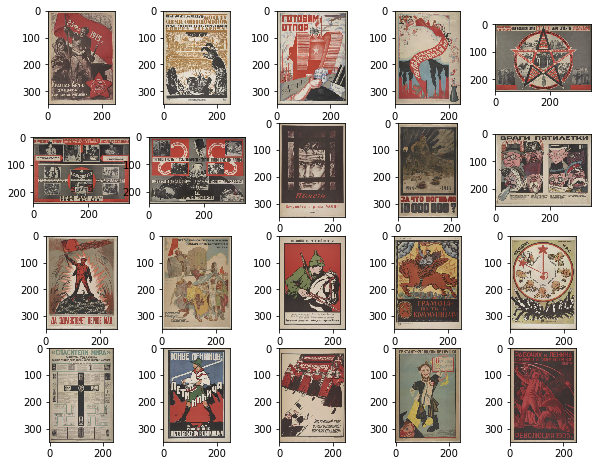

In [360]:
plt.figure(figsize=(10,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    
    plt.imshow(image)